In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://datahack2020dataset.s3.us-east-2.amazonaws.com/OfficialCompetitionDataset.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26504 entries, 0 to 26503
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           26504 non-null  int64  
 1   name                 26504 non-null  object 
 2   album                26504 non-null  object 
 3   artist               26504 non-null  object 
 4   auditory             26504 non-null  float64
 5   beats_per_measure    26504 non-null  float64
 6   beats_per_min        26504 non-null  float64
 7   concert_probability  26504 non-null  float64
 8   critic               26504 non-null  object 
 9   critic_rating        26504 non-null  float64
 10  danceability         26504 non-null  float64
 11  hotness              26504 non-null  float64
 12  hype                 26504 non-null  float64
 13  instrumentalness     26504 non-null  float64
 14  length_minutes       26504 non-null  int64  
 15  lyricism             26504 non-null 

In [4]:
df.isnull().sum()

Unnamed: 0                0
name                      0
album                     0
artist                    0
auditory                  0
beats_per_measure         0
beats_per_min             0
concert_probability       0
critic                    0
critic_rating             0
danceability              0
hotness                   0
hype                      0
instrumentalness          0
length_minutes            0
lyricism                  0
major/minor               0
nplays                    0
positivity                0
review                    0
reviewer_type          6165
song_debut                0
styles                 1691
tone                      0
volume                    0
vulgar                    0
dtype: int64

In [5]:
df["reviewer_type"].fillna("contributor", inplace=True)

In [6]:
df.dropna(subset = ["styles"], inplace=True)
df.isnull().sum()

Unnamed: 0             0
name                   0
album                  0
artist                 0
auditory               0
beats_per_measure      0
beats_per_min          0
concert_probability    0
critic                 0
critic_rating          0
danceability           0
hotness                0
hype                   0
instrumentalness       0
length_minutes         0
lyricism               0
major/minor            0
nplays                 0
positivity             0
review                 0
reviewer_type          0
song_debut             0
styles                 0
tone                   0
volume                 0
vulgar                 0
dtype: int64

In [8]:
df['nYears'] = df.apply(lambda x: 2020 - int(x['song_debut'][:4]), axis=1)
df['nplaysPerYear'] = df.apply(lambda x: x['nplays']/(x['nYears']+1), axis=1)

In [9]:
def get_sentiment(review):
  sentiment_score = TextBlob(review).sentiment[0]
  if (sentiment_score>0):
    return 'Positive'
  elif (sentiment_score<=0):
    return 'Negative'


In [11]:
from textblob import TextBlob

In [12]:
df['sentiment'] = df.apply(lambda x : get_sentiment(x["review"]),axis=1)

In [13]:
A=df["styles"].unique().tolist()
B=" ".join(A)
B=B.replace(",","")
C=set(B.split(" "))
df["styles"].str.replace(",","")
df["styles"]=df["styles"].str.split(" ")
for col in C:
  df[col]=df["styles"].apply(lambda x: 1 if col in x else 0)

In [14]:
df

,Unnamed: 0,name,album,artist,auditory,beats_per_measure,beats_per_min,concert_probability,critic,critic_rating,danceability,hotness,hype,instrumentalness,length_minutes,lyricism,major/minor,nplays,positivity,review,reviewer_type,song_debut,styles,tone,volume,vulgar,nYears,nplaysPerYear,sentiment,experimental,global,pop/r&b,folk/country,metal,rap,jazz,electronic,rock
0,21803,A Forgotten Chapter In The History Of Ideas,VI,the fucking champs,0.240300,4.0,175.934,32.00,adam moerder,70.0,1.216527,1.0,0.627541,1.060468,388200,8.0,major,5026,-0.676431,\r\n What an opportune time for a Fucking C...,contributor,2007-04-24,[rock],C#,0.794281,NOT VULGAR,13,3.590000e+02,Positive,0,0,0,0,0,0,0,0,1
1,20617,I Would Like to Write a Song That...,Muted,alias,0.020610,4.0,97.017,24.40,william morris,60.0,1.382647,0.6,0.575489,1.256408,252560,7.0,major,7823,-0.684217,"Listen up, kids; it's time for me to play like...",contributor,2003-10-28,"[electronic,, rock]",D,0.760773,NOT VULGAR,17,4.346111e+02,Positive,0,0,0,0,0,0,0,0,1
2,8523,Awake On A Train,Yesterday Was Dramatic – Today Is OK,mm,0.882000,4.0,110.005,9.99,matt lemay,91.0,1.469614,4.0,0.498955,1.125781,563253,3.0,major,161260,0.016498,"Surprises are the best. Once, when I was in ki...",contributor,2005-10-04,"[electronic,, rock]",F,0.738168,NOT VULGAR,15,1.007875e+04,Positive,0,0,0,0,0,0,0,0,1
3,4018,Dress,Sylvan Esso,sylvan esso,2.571000,4.0,139.955,10.50,ian cohen,62.0,1.958150,8.8,0.456158,-0.844109,229840,9.0,minor,14379524,-0.964502,There are bands that arrive fully formed with ...,contributor,2014-05-13,[pop/r&b],F,0.824472,NOT VULGAR,6,2.054218e+06,Positive,0,0,1,0,0,0,0,0,0
4,20834,People Die,Travistan,travis morrison,0.221400,3.0,144.033,35.00,chris dahlen,0.0,2.377382,0.4,0.400788,-0.844077,262627,8.0,minor,4549,1.857820,Travis Morrison got his ass kicked. He tells ...,contributor,2004,[pop/r&b],F,0.777020,NOT VULGAR,16,2.675882e+02,Positive,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26499,24579,"I Can't Feel My Hand Any More, It's Alright, S...",Finally We Are No One,mm,1.719000,3.0,179.885,37.10,mark richard-san,75.0,1.375751,4.4,0.463105,1.283622,340133,7.0,major,566540,-1.318363,"The buzz around Múm began early in 2001, and t...",contributor,2002-05-20,"[electronic,, rock]",C,0.716484,NOT VULGAR,18,2.981789e+04,Positive,0,0,0,0,0,0,0,0,1
26500,7602,Flaws,Artificial Sweeteners,fujiya & miyagi,0.030600,4.0,122.984,6.75,brian howe,58.0,1.890800,3.6,0.657002,1.261851,348787,5.0,major,394374,1.102605,"Ten years ago, Fujiya & Miyagi seemed fresh an...",contributor,2014-05-06,"[electronic,, rock]",C,0.811926,NOT VULGAR,6,5.633914e+04,Positive,0,0,0,0,0,0,0,0,1
26501,8549,Resolve,In Your Honor,foo fighters,0.000023,4.0,110.356,25.90,amanda petrusich,68.0,1.499303,9.2,0.591114,-0.719056,288640,2.0,major,6264446,-0.170359,"Having publicly declared In Your Honor, the Fo...",contributor,2005-06-14,[rock],D,0.851976,NOT VULGAR,15,3.915279e+05,Positive,0,0,0,0,0,0,0,0,1
26502,6042,Ascension,3001: A Laced Odyssey,flatbush zombies,1.290000,4.0,59.672,10.50,kathy iandoli,72.0,1.447735,9.2,0.427879,-0.844369,301027,7.0,major,10487136,-0.742610,"For those paying attention, 2012 represented a...",contributor,2016-03-11,[rap],F#,0.733683,VULGAR,4,2.097427e+06,Positive,0,0,0,0,0,1,0,0,0


In [21]:
df.drop(columns=['song_debut', 'styles'],inplace=True)

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler()
df[['auditory','beats_per_measure','beats_per_min','concert_probability','critic_rating','danceability','hotness','hype','instrumentalness','length_minutes','nplays',
                 'positivity','volume','nplaysPerYear']] = scaler.fit_transform(df[['auditory','beats_per_measure','beats_per_min','concert_probability','critic_rating','danceability','hotness','hype','instrumentalness','length_minutes','nplays',
                 'positivity','volume','nplaysPerYear']])

In [20]:
df.head()

,Unnamed: 0,name,album,artist,auditory,beats_per_measure,beats_per_min,concert_probability,critic,critic_rating,danceability,hotness,hype,instrumentalness,length_minutes,lyricism,major/minor,nplays,positivity,review,reviewer_type,song_debut,styles,tone,volume,vulgar,nYears,nplaysPerYear,sentiment,experimental,global,pop/r&b,folk/country,metal,rap,jazz,electronic,rock
0,21803,A Forgotten Chapter In The History Of Ideas,VI,the fucking champs,0.080422,0.8,0.738706,0.320963,adam moerder,0.70,0.128029,0.056818,0.905351,0.702106,0.107415,8.0,major,0.000003,0.234,\r\n What an opportune time for a Fucking C...,contributor,2007-04-24,[rock],C#,0.794281,NOT VULGAR,13,9.062205e-07,Positive,0,0,0,0,0,0,0,0,1
1,20617,I Would Like to Write a Song That...,Muted,alias,0.006898,0.8,0.407352,0.244734,william morris,0.60,0.226253,0.034091,0.830255,0.774323,0.069786,7.0,major,0.000004,0.232,"Listen up, kids; it's time for me to play like...",contributor,2003-10-28,"[electronic,, rock]",D,0.760773,NOT VULGAR,17,1.097085e-06,Positive,0,0,0,0,0,0,0,0,1
2,8523,Awake On A Train,Yesterday Was Dramatic – Today Is OK,mm,0.295181,0.8,0.461886,0.100201,matt lemay,0.91,0.277675,0.227273,0.719841,0.726179,0.155977,3.0,major,0.000081,0.412,"Surprises are the best. Once, when I was in ki...",contributor,2005-10-04,"[electronic,, rock]",F,0.738168,NOT VULGAR,15,2.544170e-05,Positive,0,0,0,0,0,0,0,0,1
3,4018,Dress,Sylvan Esso,sylvan esso,0.860442,0.8,0.587639,0.105316,ian cohen,0.62,0.566539,0.500000,0.658097,0.000148,0.063483,9.0,minor,0.007260,0.160,There are bands that arrive fully formed with ...,contributor,2014-05-13,[pop/r&b],F,0.824472,NOT VULGAR,6,5.185443e-03,Positive,0,0,1,0,0,0,0,0,0
4,20834,People Die,Travistan,travis morrison,0.074096,0.6,0.604761,0.351053,chris dahlen,0.00,0.814424,0.022727,0.578214,0.000160,0.072579,8.0,minor,0.000002,0.885,Travis Morrison got his ass kicked. He tells ...,contributor,2004,[pop/r&b],F,0.777020,NOT VULGAR,16,6.754706e-07,Positive,0,0,1,0,0,0,0,0,0


In [22]:
# Inspect the categorical variables

df.select_dtypes('object').nunique()

name             23237
album             2232
artist            1448
critic             247
major/minor          2
review            2243
reviewer_type       13
tone                12
vulgar               2
sentiment            2
dtype: int64

In [24]:
df.drop(columns=['name','album','artist','critic','reviewer_type','review'],inplace=True)

In [26]:
df=pd.get_dummies(df)

In [34]:
df.drop(columns='Unnamed: 0',inplace=True)

In [36]:
df.drop(columns='nYears',inplace=True)

In [37]:
df

,auditory,beats_per_measure,beats_per_min,concert_probability,critic_rating,danceability,hotness,hype,instrumentalness,length_minutes,lyricism,nplays,positivity,volume,nplaysPerYear,experimental,global,pop/r&b,folk/country,metal,rap,jazz,electronic,rock,major/minor_major,major/minor_minor,tone_A,tone_Ab,tone_B,tone_Bb,tone_C,tone_C#,tone_D,tone_D#,tone_E,tone_F,tone_F#,tone_G,vulgar_NOT VULGAR,vulgar_VULGAR,sentiment_Negative,sentiment_Positive
0,0.080422,0.8,0.738706,0.320963,0.70,0.128029,0.056818,0.905351,0.702106,0.107415,8.0,0.000003,0.2340,0.794281,9.062205e-07,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
1,0.006898,0.8,0.407352,0.244734,0.60,0.226253,0.034091,0.830255,0.774323,0.069786,7.0,0.000004,0.2320,0.760773,1.097085e-06,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
2,0.295181,0.8,0.461886,0.100201,0.91,0.277675,0.227273,0.719841,0.726179,0.155977,3.0,0.000081,0.4120,0.738168,2.544170e-05,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
3,0.860442,0.8,0.587639,0.105316,0.62,0.566539,0.500000,0.658097,0.000148,0.063483,9.0,0.007260,0.1600,0.824472,5.185443e-03,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
4,0.074096,0.6,0.604761,0.351053,0.00,0.814424,0.022727,0.578214,0.000160,0.072579,8.0,0.000002,0.8850,0.777020,6.754706e-07,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26499,0.575301,0.6,0.755296,0.372116,0.75,0.222176,0.250000,0.668119,0.784353,0.094080,7.0,0.000286,0.0691,0.716484,7.526905e-05,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
26500,0.010241,0.8,0.516382,0.067703,0.58,0.526716,0.204545,0.947853,0.776329,0.096481,5.0,0.000199,0.6910,0.811926,1.422164e-04,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
26501,0.000008,0.8,0.463359,0.259779,0.68,0.295230,0.522727,0.852798,0.046239,0.079795,2.0,0.003163,0.3640,0.851976,9.883303e-04,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
26502,0.431727,0.8,0.250549,0.105316,0.72,0.264738,0.522727,0.617298,0.000053,0.083232,7.0,0.005295,0.2170,0.733683,5.294517e-03,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1


In [39]:
df['KPI_1'] = 0.8*df['hotness'] + 0.1*df['critic_rating'] + 0.1*df['nplaysPerYear'] + df['sentiment_Positive']

In [41]:
df['KPI_1'] = df.apply(lambda x : 1 if x['KPI_1']>=1.5 else 0,axis=1)

In [42]:
df['KPI_1'].value_counts()

0    23881
1      932
Name: KPI_1, dtype: int64

In [46]:
X = df.drop(['KPI_1','hotness','critic_rating','nplaysPerYear','nplays','sentiment_Negative','sentiment_Positive'],axis=1)
y = df ['KPI_1']

In [63]:
X.head()

,auditory,beats_per_measure,beats_per_min,concert_probability,danceability,hype,instrumentalness,length_minutes,lyricism,positivity,volume,experimental,global,pop/r&b,folk/country,metal,rap,jazz,electronic,rock,major/minor_major,major/minor_minor,tone_A,tone_Ab,tone_B,tone_Bb,tone_C,tone_C#,tone_D,tone_D#,tone_E,tone_F,tone_F#,tone_G,vulgar_NOT VULGAR,vulgar_VULGAR
0,0.080422,0.8,0.738706,0.320963,0.128029,0.905351,0.702106,0.107415,8.0,0.234,0.794281,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,0.006898,0.8,0.407352,0.244734,0.226253,0.830255,0.774323,0.069786,7.0,0.232,0.760773,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,0.295181,0.8,0.461886,0.100201,0.277675,0.719841,0.726179,0.155977,3.0,0.412,0.738168,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,0.860442,0.8,0.587639,0.105316,0.566539,0.658097,0.000148,0.063483,9.0,0.160,0.824472,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0.074096,0.6,0.604761,0.351053,0.814424,0.578214,0.000160,0.072579,8.0,0.885,0.777020,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [64]:
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: KPI_1, dtype: int64

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
import xgboost as xgb
import lightgbm as lgb
from xgboost import XGBClassifier,plot_importance

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
import skopt
from skopt import BayesSearchCV

from sklearn import model_selection
from sklearn.model_selection import cross_val_score

In [50]:
!pip install scikit-optimize

     |████████████████████████████████| 102kB 5.5MB/s 


In [52]:
# Model No.1 Logistic
# Instantiate the model

logit_model = LogisticRegression()

# Fit the model using training data

logit_model = logit_model.fit(X_train, y_train)

predicted_train = logit_model.predict(X_train)
print('The train accuracy is: ', metrics.accuracy_score(y_train, predicted_train))


# Predictions on the test dataset
logit_predicted_test = pd.DataFrame(logit_model.predict(X_test))
print('The test accuracy is: ', metrics.accuracy_score(y_test, logit_predicted_test))


The train accuracy is:  0.9619143576826197
The test accuracy is:  0.9645375780777755


In [53]:
print(metrics.confusion_matrix(y_test, logit_predicted_test))
print(metrics.classification_report(y_test, logit_predicted_test))

[[4787    0]
 [ 176    0]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      4787
           1       0.00      0.00      0.00       176

    accuracy                           0.96      4963
   macro avg       0.48      0.50      0.49      4963
weighted avg       0.93      0.96      0.95      4963



In [54]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

In [55]:
decision_tree_classifier = tree.DecisionTreeClassifier()

In [56]:
decision_tree_classifier.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [61]:
def cross_validation(model,X_train,y_train,modelName):
    scoring = 'roc_auc'
    score = model_selection.cross_val_score(model, X_train, y_train, cv = 10, scoring=scoring)
    mean_score = score.mean()
    print("ROC-AUC Value for " + str(modelName) + ": %.3f (%.3f)" % (score.mean(), score.std()))
    return mean_score

In [62]:
cross_validation(decision_tree_classifier,X_train,y_train,'Decision_Tree')

ROC-AUC Value for Decision_Tree: 0.542 (0.011)


0.5416351525021337

In [65]:
decision_tree_test_preds = decision_tree_classifier.predict(X_test) ## testing the model on validation set

In [67]:
cross_validation(decision_tree_classifier,X_test,y_test,'Decision_Tree')

ROC-AUC Value for Decision_Tree: 0.531 (0.032)


0.530832612975193

In [66]:
print(metrics.confusion_matrix(y_test, decision_tree_test_preds))
print(metrics.classification_report(y_test, decision_tree_test_preds))

[[4572  215]
 [ 157   19]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      4787
           1       0.08      0.11      0.09       176

    accuracy                           0.93      4963
   macro avg       0.52      0.53      0.53      4963
weighted avg       0.94      0.93      0.93      4963



In [68]:
import xgboost as xgb
import lightgbm as lgb
from xgboost import XGBClassifier,plot_importance

In [69]:
xgboost_classifier = XGBClassifier()

In [70]:
cross_validation(xgboost_classifier,X_train,y_train,'XGB_Classifier')

ROC-AUC Value for XGB_Classifier: 0.737 (0.026)


0.7371808392879989

In [71]:
xgboost_classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [72]:
xgboost_predictions = xgboost_classifier.predict(X_test)

In [73]:
print(metrics.confusion_matrix(y_test, xgboost_predictions))
print(metrics.classification_report(y_test, xgboost_predictions))

[[4787    0]
 [ 176    0]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      4787
           1       0.00      0.00      0.00       176

    accuracy                           0.96      4963
   macro avg       0.48      0.50      0.49      4963
weighted avg       0.93      0.96      0.95      4963



In [80]:
ITERATIONS = 10


# Classifier
bayes_cv_tuner = BayesSearchCV(
    estimator = xgb.XGBClassifier(
        n_jobs = 1,
        objective = 'binary:logistic',
        eval_metric = 'auc',
        silent=1,
        tree_method='approx'
    ),
      search_spaces = {
        'min_samples_split': [3, 5, 8, 10, 20], 
        'n_estimators' : (100, 600),
        'max_depth': (3,20),
        'max_features': [3, 5, 8],
        'learning_rate': (0.01, 1.0, 'log-uniform'),
        'colsample_bytree': (0.1, 1.0, 'uniform'),
        'colsample_bylevel': (0.4, 1.0, 'uniform')


    },     
    scoring = 'roc_auc',
    cv = StratifiedKFold(
        n_splits=5,
        shuffle=True,
        random_state=42
    ),
    n_jobs = 3,
    n_iter = ITERATIONS,   
    verbose = 0,
    refit = True,
    random_state = 42
)

In [81]:
def Print_Model_Results(optim_result):
    """Status callback durring bayesian hyperparameter search"""
    
    all_models = pd.DataFrame(bayes_cv_tuner.cv_results_)    
    
    # Get current parameters and the best parameters    
    best_params = pd.Series(bayes_cv_tuner.best_params_)
    print('Model #{}\nBest ROC-AUC: {}\nBest params: {}\n'.format(
        len(all_models),
        np.round(bayes_cv_tuner.best_score_, 4),
        bayes_cv_tuner.best_params_
    ))
    

In [82]:
result = bayes_cv_tuner.fit(X_train, y_train, callback=Print_Model_Results)

Model #1
Best ROC-AUC: 0.6889
Best params: OrderedDict([('colsample_bylevel', 0.6460623753119883), ('colsample_bytree', 0.7549531688595925), ('learning_rate', 0.7340675018434776), ('max_depth', 8), ('max_features', 5), ('min_samples_split', 8), ('n_estimators', 275)])

Model #2
Best ROC-AUC: 0.7399
Best params: OrderedDict([('colsample_bylevel', 0.9024330133319707), ('colsample_bytree', 0.894983749642776), ('learning_rate', 0.04044084484117812), ('max_depth', 19), ('max_features', 8), ('min_samples_split', 3), ('n_estimators', 169)])

Model #3
Best ROC-AUC: 0.7399
Best params: OrderedDict([('colsample_bylevel', 0.9024330133319707), ('colsample_bytree', 0.894983749642776), ('learning_rate', 0.04044084484117812), ('max_depth', 19), ('max_features', 8), ('min_samples_split', 3), ('n_estimators', 169)])

Model #4
Best ROC-AUC: 0.7399
Best params: OrderedDict([('colsample_bylevel', 0.9024330133319707), ('colsample_bytree', 0.894983749642776), ('learning_rate', 0.04044084484117812), ('max_de

In [128]:
xgb_bayestuned=XGBClassifier(max_depth=6,max_features=8,min_samples_split=5,n_estimators=330,colsample_bylevel=0.840416810791341,colsample_bytree = 0.9454327638424945,learning_rate = 0.02124292702906457)

In [129]:
xgb_bayestuned.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree',
              colsample_bylevel=0.840416810791341, colsample_bynode=1,
              colsample_bytree=0.9454327638424945, gamma=0,
              learning_rate=0.02124292702906457, max_delta_step=0, max_depth=6,
              max_features=8, min_child_weight=1, min_samples_split=5,
              missing=None, n_estimators=330, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

In [130]:
xgboost_predictions_tuned = xgb_bayestuned.predict(X_test)

In [86]:
print(metrics.confusion_matrix(y_test, xgboost_predictions_tuned))
print(metrics.classification_report(y_test, xgboost_predictions_tuned))

[[4787    0]
 [ 176    0]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      4787
           1       0.00      0.00      0.00       176

    accuracy                           0.96      4963
   macro avg       0.48      0.50      0.49      4963
weighted avg       0.93      0.96      0.95      4963



In [ ]:
xgb_predictions = xgboost_classifier.predict(Xb_test) ## Predictions for KNN

print('The accuracy score for xgboost_classifier classifier is:',accuracy_score(y_test,xgb_predictions),'\n')
print('The precision score for xgboost_classifier classifier is: ',precision_score(y_test,xgb_predictions,average='weighted'),'\n')
print('The recall score for xgboost_classifier classifier is: ', recall_score(y_test,xgb_predictions,average='weighted'),'\n')

print('The classification report is: ')

print('\n',metrics.classification_report(y_test, xgb_predictions))

In [87]:
cross_validation(xgboost_classifier,X_test,y_test,'XGB_Classifier')

ROC-AUC Value for XGB_Classifier: 0.712 (0.066)


0.711829913494793

In [89]:
pip install shap

     |████████████████████████████████| 358kB 7.2MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491620 sha256=6d3c9439c27f0e96faeef87d5e02d8bc3cb3ce6432e468ff44eb0234530db5da
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


100%|===================| 24773/24813 [06:10<00:00]       

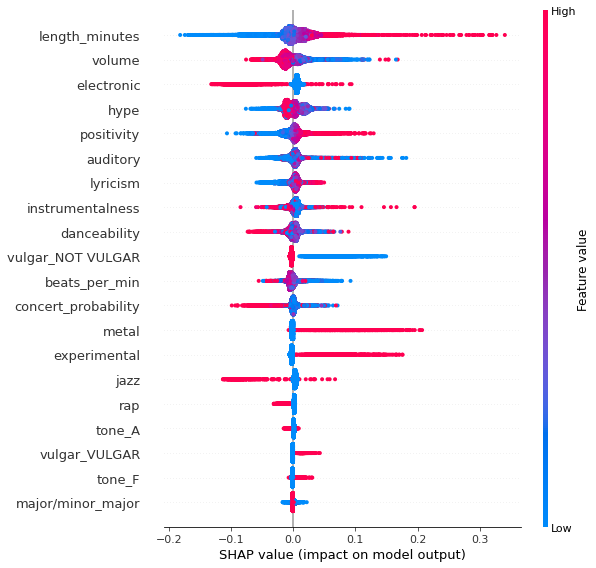

In [131]:
import shap

explainer = shap.TreeExplainer(xgb_bayestuned, model_output='probability', feature_dependence='independent', data=X)

shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X)
 


### KPI 2

In [92]:
df['KPI_2'] = 0.1*df['hotness'] + 0.6*df['critic_rating'] + 0.3*df['nplaysPerYear'] + df['sentiment_Positive']

In [93]:
df.head()

,auditory,beats_per_measure,beats_per_min,concert_probability,critic_rating,danceability,hotness,hype,instrumentalness,length_minutes,lyricism,nplays,positivity,volume,nplaysPerYear,experimental,global,pop/r&b,folk/country,metal,rap,jazz,electronic,rock,major/minor_major,major/minor_minor,tone_A,tone_Ab,tone_B,tone_Bb,tone_C,tone_C#,tone_D,tone_D#,tone_E,tone_F,tone_F#,tone_G,vulgar_NOT VULGAR,vulgar_VULGAR,sentiment_Negative,sentiment_Positive,KPI_1,KPI_2
0,0.080422,0.8,0.738706,0.320963,0.70,0.128029,0.056818,0.905351,0.702106,0.107415,8.0,0.000003,0.234,0.794281,9.062205e-07,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1.425682
1,0.006898,0.8,0.407352,0.244734,0.60,0.226253,0.034091,0.830255,0.774323,0.069786,7.0,0.000004,0.232,0.760773,1.097085e-06,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1.363409
2,0.295181,0.8,0.461886,0.100201,0.91,0.277675,0.227273,0.719841,0.726179,0.155977,3.0,0.000081,0.412,0.738168,2.544170e-05,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1.568735
3,0.860442,0.8,0.587639,0.105316,0.62,0.566539,0.500000,0.658097,0.000148,0.063483,9.0,0.007260,0.160,0.824472,5.185443e-03,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1.423556
4,0.074096,0.6,0.604761,0.351053,0.00,0.814424,0.022727,0.578214,0.000160,0.072579,8.0,0.000002,0.885,0.777020,6.754706e-07,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1.002273


In [94]:
df['KPI_2'] = df.apply(lambda x : 1 if x['KPI_2']>=1.5 else 0,axis=1)

In [95]:
X = df.drop(['KPI_1','KPI_2','hotness','critic_rating','nplaysPerYear','nplays','sentiment_Negative','sentiment_Positive'],axis=1)
y = df ['KPI_2']

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
X.head()

,auditory,beats_per_measure,beats_per_min,concert_probability,danceability,hype,instrumentalness,length_minutes,lyricism,positivity,volume,experimental,global,pop/r&b,folk/country,metal,rap,jazz,electronic,rock,major/minor_major,major/minor_minor,tone_A,tone_Ab,tone_B,tone_Bb,tone_C,tone_C#,tone_D,tone_D#,tone_E,tone_F,tone_F#,tone_G,vulgar_NOT VULGAR,vulgar_VULGAR
0,0.080422,0.8,0.738706,0.320963,0.128029,0.905351,0.702106,0.107415,8.0,0.234,0.794281,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,0.006898,0.8,0.407352,0.244734,0.226253,0.830255,0.774323,0.069786,7.0,0.232,0.760773,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,0.295181,0.8,0.461886,0.100201,0.277675,0.719841,0.726179,0.155977,3.0,0.412,0.738168,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,0.860442,0.8,0.587639,0.105316,0.566539,0.658097,0.000148,0.063483,9.0,0.160,0.824472,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0.074096,0.6,0.604761,0.351053,0.814424,0.578214,0.000160,0.072579,8.0,0.885,0.777020,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


293      1
11587    0
26084    1
21976    0
13708    1
        ..
16878    1
24300    0
4931     0
25946    0
11098    0
Name: KPI_2, Length: 4963, dtype: int64

In [102]:
ITERATIONS = 5


# Classifier
bayes_cv_tuner = BayesSearchCV(
    estimator = xgb.XGBClassifier(
        n_jobs = 1,
        objective = 'binary:logistic',
        eval_metric = 'auc',
        silent=1,
        tree_method='approx'
    ),
      search_spaces = {
        'min_samples_split': [3, 5, 8, 10, 20], 
        'n_estimators' : (100, 600),
        'max_depth': (3,20),
        'max_features': [3, 5, 8],
        'learning_rate': (0.01, 1.0, 'log-uniform'),
        'colsample_bytree': (0.1, 1.0, 'uniform'),
        'colsample_bylevel': (0.4, 1.0, 'uniform')


    },     
    scoring = 'roc_auc',
    cv = StratifiedKFold(
        n_splits=5,
        shuffle=True,
        random_state=42
    ),
    n_jobs = 3,
    n_iter = ITERATIONS,   
    verbose = 0,
    refit = True,
    random_state = 42
)

In [103]:
def Print_Model_Results(optim_result):
    """Status callback durring bayesian hyperparameter search"""
    
    all_models = pd.DataFrame(bayes_cv_tuner.cv_results_)    
    
    # Get current parameters and the best parameters    
    best_params = pd.Series(bayes_cv_tuner.best_params_)
    print('Model #{}\nBest ROC-AUC: {}\nBest params: {}\n'.format(
        len(all_models),
        np.round(bayes_cv_tuner.best_score_, 4),
        bayes_cv_tuner.best_params_
    ))
    

In [104]:
result = bayes_cv_tuner.fit(X_train, y_train, callback=Print_Model_Results)

Model #1
Best ROC-AUC: 0.5829
Best params: OrderedDict([('colsample_bylevel', 0.6460623753119883), ('colsample_bytree', 0.7549531688595925), ('learning_rate', 0.7340675018434776), ('max_depth', 8), ('max_features', 5), ('min_samples_split', 8), ('n_estimators', 275)])

Model #2
Best ROC-AUC: 0.6226
Best params: OrderedDict([('colsample_bylevel', 0.9024330133319707), ('colsample_bytree', 0.894983749642776), ('learning_rate', 0.04044084484117812), ('max_depth', 19), ('max_features', 8), ('min_samples_split', 3), ('n_estimators', 169)])

Model #3
Best ROC-AUC: 0.6226
Best params: OrderedDict([('colsample_bylevel', 0.9024330133319707), ('colsample_bytree', 0.894983749642776), ('learning_rate', 0.04044084484117812), ('max_depth', 19), ('max_features', 8), ('min_samples_split', 3), ('n_estimators', 169)])

Model #4
Best ROC-AUC: 0.6226
Best params: OrderedDict([('colsample_bylevel', 0.9024330133319707), ('colsample_bytree', 0.894983749642776), ('learning_rate', 0.04044084484117812), ('max_de

KeyboardInterrupt: ignored

In [105]:
xgb_bayestuned=XGBClassifier(max_depth=19,max_features=8,min_samples_split=3,n_estimators=169,colsample_bylevel=0.9024330133319707,colsample_bytree = 0.894983749642776,learning_rate = 0.04044084484117812)


In [106]:
xgb_bayestuned.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree',
              colsample_bylevel=0.9024330133319707, colsample_bynode=1,
              colsample_bytree=0.894983749642776, gamma=0,
              learning_rate=0.04044084484117812, max_delta_step=0, max_depth=19,
              max_features=8, min_child_weight=1, min_samples_split=3,
              missing=None, n_estimators=169, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

In [107]:
xgboost_predictions_tuned = xgb_bayestuned.predict(X_test)

In [108]:
print(metrics.confusion_matrix(y_test, xgboost_predictions_tuned))
print(metrics.classification_report(y_test, xgboost_predictions_tuned))


[[3957   22]
 [ 947   37]]
              precision    recall  f1-score   support

           0       0.81      0.99      0.89      3979
           1       0.63      0.04      0.07       984

    accuracy                           0.80      4963
   macro avg       0.72      0.52      0.48      4963
weighted avg       0.77      0.80      0.73      4963



In [109]:
cross_validation(xgboost_classifier,X_test,y_test,'XGB_Classifier')

ROC-AUC Value for XGB_Classifier: 0.549 (0.023)


0.5486908087335783

In [110]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn import metrics

In [112]:
xgb_predictions = xgboost_classifier.predict(X_test) ## Predictions for KNN

print('The accuracy score for xgboost_classifier classifier is:',accuracy_score(y_test,xgb_predictions),'\n')
print('The precision score for xgboost_classifier classifier is: ',precision_score(y_test,xgb_predictions,average='weighted'),'\n')
print('The recall score for xgboost_classifier classifier is: ', recall_score(y_test,xgb_predictions,average='weighted'),'\n')

print('The classification report is: ')

print('\n',metrics.classification_report(y_test, xgb_predictions))

The accuracy score for xgboost_classifier classifier is: 0.8017328228893814 

The precision score for xgboost_classifier classifier is:  0.6427755192981762 

The recall score for xgboost_classifier classifier is:  0.8017328228893814 

The classification report is: 

               precision    recall  f1-score   support

           0       0.80      1.00      0.89      3979
           1       0.00      0.00      0.00       984

    accuracy                           0.80      4963
   macro avg       0.40      0.50      0.44      4963
weighted avg       0.64      0.80      0.71      4963



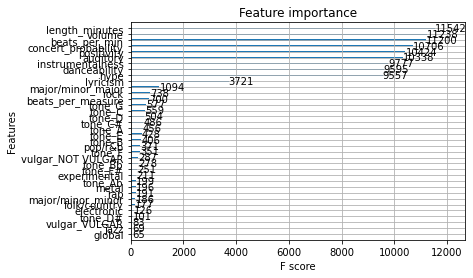

In [117]:
from xgboost import plot_importance

plot_importance(xgb_bayestuned)

 99%|===================| 24676/24813 [00:39<00:00]       

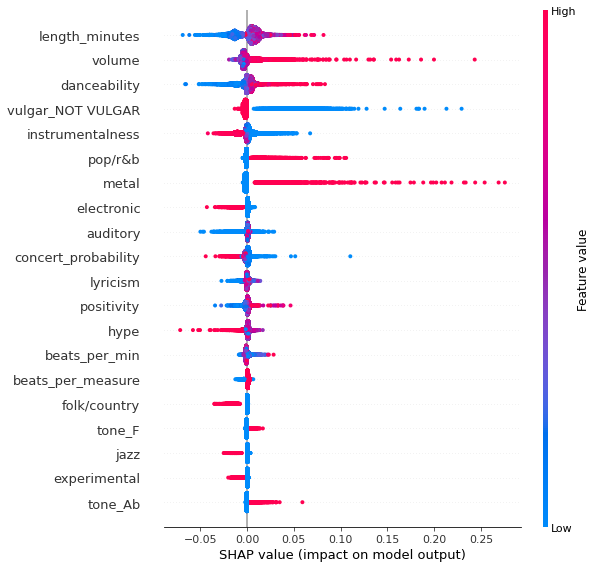

In [113]:
import shap

explainer = shap.TreeExplainer(xgboost_classifier, model_output='probability', feature_dependence='independent', data=X)

shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X)



In [118]:
## check best song

id_max=y_test.loc[y_test['KPI_2'].idmax()]

AttributeError: ignored

In [124]:
# selecting rows based on condition
rslt_df = df.loc[df['KPI_1'] == 1]

In [125]:
rslt_df.describe()

,auditory,beats_per_measure,beats_per_min,concert_probability,critic_rating,danceability,hotness,hype,instrumentalness,length_minutes,lyricism,nplays,positivity,volume,nplaysPerYear,experimental,global,pop/r&b,folk/country,metal,rap,jazz,electronic,rock,major/minor_major,major/minor_minor,tone_A,tone_Ab,tone_B,tone_Bb,tone_C,tone_C#,tone_D,tone_D#,tone_E,tone_F,tone_F#,tone_G,vulgar_NOT VULGAR,vulgar_VULGAR,sentiment_Negative,sentiment_Positive,KPI_1,KPI_2
count,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.0,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.0,932.0,932.0,932.000000
mean,0.251520,0.784549,0.500409,0.186398,0.754034,0.440818,0.639826,0.702578,0.181054,0.068513,4.866953,0.033707,0.470593,0.801079,0.020518,0.003219,0.003219,0.163090,0.009657,0.050429,0.142704,0.0,0.035408,0.592275,0.664163,0.335837,0.112661,0.067597,0.082618,0.047210,0.109442,0.104077,0.120172,0.027897,0.077253,0.085837,0.054721,0.110515,0.814378,0.185622,0.0,1.0,1.0,0.686695
std,0.297571,0.077678,0.120417,0.144566,0.166206,0.179336,0.091347,0.208036,0.299725,0.024910,2.952816,0.075940,0.247498,0.058577,0.064681,0.056674,0.056674,0.369646,0.097845,0.218946,0.349958,0.0,0.184907,0.491675,0.472536,0.472536,0.316348,0.251187,0.275452,0.212202,0.312361,0.305525,0.325337,0.164766,0.267136,0.280273,0.227557,0.313699,0.389010,0.389010,0.0,0.0,0.0,0.464086
min,0.000003,0.200000,0.243117,0.023270,0.170000,0.037631,0.500000,0.021764,0.000000,0.012842,0.000000,0.000598,0.034900,0.419976,0.000166,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,1.0,0.000000
25%,0.013203,0.800000,0.404453,0.097768,0.700000,0.304811,0.568182,0.582797,0.000007,0.054881,2.000000,0.006155,0.276000,0.774383,0.002489,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,1.0,1.0,0.000000
50%,0.105422,0.800000,0.493076,0.127382,0.780000,0.423363,0.625000,0.746743,0.003345,0.064741,5.000000,0.012248,0.467500,0.813032,0.006254,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,1.0,1.0,1.000000
75%,0.404869,0.800000,0.579368,0.228185,0.860000,0.560764,0.693182,0.869674,0.274824,0.077627,8.000000,0.027835,0.652000,0.840812,0.015447,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,1.0,1.0,1.000000
max,0.995984,1.000000,0.873269,0.972919,1.000000,0.970051,1.000000,0.995665,0.981946,0.374901,9.000000,1.000000,0.968000,0.916490,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.0,1.0,1.000000


In [126]:
# selecting rows based on condition
rslt_df = df.loc[df['KPI_2'] == 1]

In [127]:
rslt_df.describe()

,auditory,beats_per_measure,beats_per_min,concert_probability,critic_rating,danceability,hotness,hype,instrumentalness,length_minutes,lyricism,nplays,positivity,volume,nplaysPerYear,experimental,global,pop/r&b,folk/country,metal,rap,jazz,electronic,rock,major/minor_major,major/minor_minor,tone_A,tone_Ab,tone_B,tone_Bb,tone_C,tone_C#,tone_D,tone_D#,tone_E,tone_F,tone_F#,tone_G,vulgar_NOT VULGAR,vulgar_VULGAR,sentiment_Negative,sentiment_Positive,KPI_1,KPI_2
count,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.0,4859.0,4859.000000,4859.0
mean,0.316010,0.771352,0.505525,0.198178,0.844373,0.373965,0.301972,0.653600,0.299128,0.070553,4.598889,0.005700,0.410908,0.776697,0.003630,0.039720,0.008850,0.072031,0.039926,0.044248,0.070179,0.008438,0.050628,0.665981,0.686149,0.313851,0.110105,0.042396,0.084174,0.058654,0.127392,0.080263,0.122865,0.026960,0.091994,0.075324,0.051451,0.128421,0.923647,0.076353,0.0,1.0,0.131714,1.0
std,0.334722,0.098331,0.125567,0.158873,0.052518,0.176966,0.190450,0.240283,0.362489,0.045224,2.826943,0.032960,0.254760,0.073266,0.028745,0.195321,0.093665,0.258566,0.195805,0.205666,0.255475,0.091479,0.219259,0.471695,0.464104,0.464104,0.313053,0.201511,0.277677,0.235000,0.333446,0.271729,0.328316,0.161984,0.289048,0.263941,0.220938,0.334593,0.265590,0.265590,0.0,0.0,0.338215,0.0
min,0.000000,0.000000,0.000000,0.000000,0.350000,0.000000,0.000000,0.000000,0.000000,0.002841,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.000000,1.0
25%,0.014508,0.800000,0.411301,0.101304,0.810000,0.239439,0.159091,0.490057,0.000304,0.048540,2.000000,0.000060,0.192000,0.742606,0.000019,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,1.0,0.000000,1.0
50%,0.165663,0.800000,0.501929,0.129388,0.840000,0.355714,0.284091,0.693320,0.058676,0.062755,5.000000,0.000337,0.385000,0.792131,0.000141,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,1.0,0.000000,1.0
75%,0.611446,0.800000,0.587053,0.251755,0.870000,0.487184,0.431818,0.855192,0.693079,0.080115,7.000000,0.001635,0.603000,0.826983,0.000719,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,1.0,0.000000,1.0
max,1.000000,1.000000,1.000000,0.977934,1.000000,0.988900,1.000000,1.000000,1.000000,0.947080,9.000000,1.000000,0.983000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.0,1.000000,1.0


In [119]:
df.head()

,auditory,beats_per_measure,beats_per_min,concert_probability,critic_rating,danceability,hotness,hype,instrumentalness,length_minutes,lyricism,nplays,positivity,volume,nplaysPerYear,experimental,global,pop/r&b,folk/country,metal,rap,jazz,electronic,rock,major/minor_major,major/minor_minor,tone_A,tone_Ab,tone_B,tone_Bb,tone_C,tone_C#,tone_D,tone_D#,tone_E,tone_F,tone_F#,tone_G,vulgar_NOT VULGAR,vulgar_VULGAR,sentiment_Negative,sentiment_Positive,KPI_1,KPI_2
0,0.080422,0.8,0.738706,0.320963,0.70,0.128029,0.056818,0.905351,0.702106,0.107415,8.0,0.000003,0.234,0.794281,9.062205e-07,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
1,0.006898,0.8,0.407352,0.244734,0.60,0.226253,0.034091,0.830255,0.774323,0.069786,7.0,0.000004,0.232,0.760773,1.097085e-06,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,0.295181,0.8,0.461886,0.100201,0.91,0.277675,0.227273,0.719841,0.726179,0.155977,3.0,0.000081,0.412,0.738168,2.544170e-05,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1
3,0.860442,0.8,0.587639,0.105316,0.62,0.566539,0.500000,0.658097,0.000148,0.063483,9.0,0.007260,0.160,0.824472,5.185443e-03,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
4,0.074096,0.6,0.604761,0.351053,0.00,0.814424,0.022727,0.578214,0.000160,0.072579,8.0,0.000002,0.885,0.777020,6.754706e-07,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
